# TFG - ECO - Rafael Rocha - Análise exploratória

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Descrição do dataset
<ul>
<li>Age : Age of the patient</li>

<li>Sex : Sex of the patient</li>

<li>cp : Chest Pain type</li>

<ul>
<li>Value 0: typical angina</li>

<li>Value 1: atypical angina</li>

<li>Value 2: non-anginal pain</li>

<li>Value 3: asymptomatic</li>
</ul>

<li>trtbps : resting blood pressure (in mm Hg)</li>

<li>chol: cholesterol in mg/dl fetched via BMI sensor</li>

<li>fbs: (fasting blood sugar > 120 mg/dl)</li>
<ul>
<li>1 = true</li>

<li>0 = false</li>
</ul>
<li>rest_ecg: resting electrocardiographic results</li>
<ul>
<li>Value 0: normal</li>

<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>

<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li>thalach: maximum heart rate achieved</li>

<li>exang: exercise induced angina</li>
<ul>
<li>1 = yes</li>

<li>0 = no</li>
</ul>
<li>old peak: ST depression induced by exercise relative to rest</li>

<li>slp: the slope of the peak exercise ST segment</li>
<ul>
<li>0 = unsloping</li>

<li>1 = flat</li>

<li>2 = downsloping</li>
</ul>
<li>caa: number of major vessels (0-3)</li>

<li>thall : thalassemia</li>
<ul>
<li>0 = null</li>

<li>1 = fixed defect</li>

<li>2 = normal</li>

<li>3 = reversable defect</li>
</ul>
<li>output: diagnosis of heart disease (angiographic disease status)</li>
<ul>
<li>0: < 50% diameter narrowing. less chance of heart disease</li>

<li>1: > 50% diameter narrowing. more chance of heart disease</li></ul>
</ul>

## Lendo os dados e fazendo uma visualização inicial

In [2]:
data = pd.read_csv('data/heart.csv')

data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Obtendo algumas informações iniciais dos dados

### Analisando os tipos dos dados e se possui dados null

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Como observado, quase todos as colunas são de dados inteiros de 64 bits, com excessão da coluna "oldpeak" que apresenta dados no formato float de 64 bits. Além disso o dataset conta com 303 linhas com dados de pessoas diferentes, e nenhuma coluna possui dados nulos para as entradas. Desse modo, não é necessário fazer nenhuma limpeza nos dados nessa etapa.

### Verificando se possui dados duplicados

In [4]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Como mostrado, o registro 164 está duplicado. Em vista disso, ele será removido, como mostrado abaixo.

In [5]:
data.drop_duplicates(inplace=True)

### Analisando as estatísticas para as colunas com dados contínuos

In [6]:
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

data[continuous].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


Os dados parecem estar de acordo com os valores esperados para cada um, não sendo necessário fazer nenhuma alteração nos dados nessa etapa

## Dados contínuos

### Boxen plots para os dados contínuos

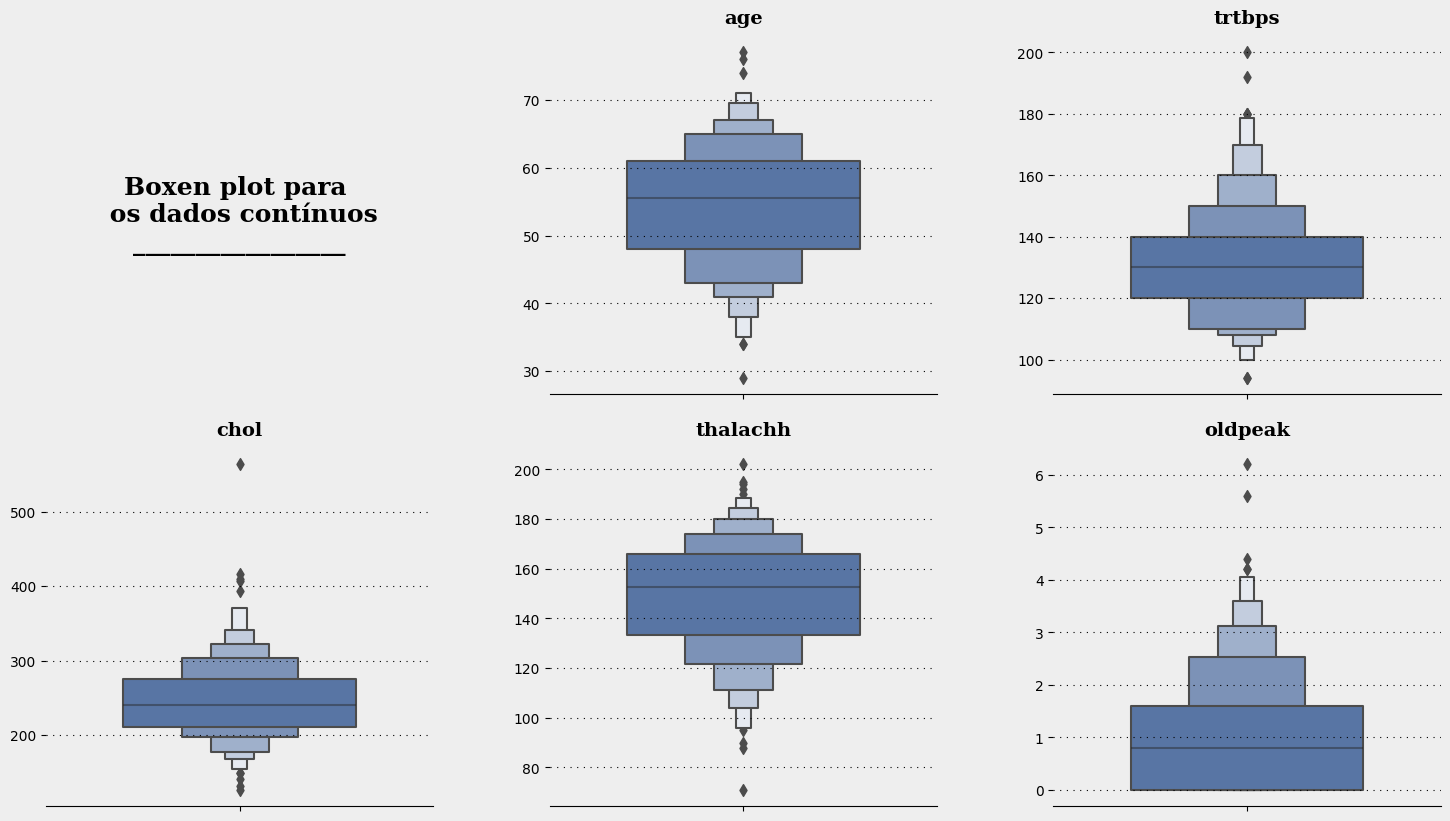

In [7]:
sns.set_palette("deep")
fig = plt.figure(figsize=(18,10))
grid_location = fig.add_gridspec(2,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuous) + 1):
    if(i < 3):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-3]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Title of the plot
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Boxen plot para \n os dados contínuos\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen plots 
for i in range(1,len(continuous) + 1):
    ax[i].text(0.5, 1.05, continuous[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax[i],y=data[continuous[i-1]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].spines["bottom"].set_visible(True)

### Boxen plots para os dados contínuos de acordo com o output

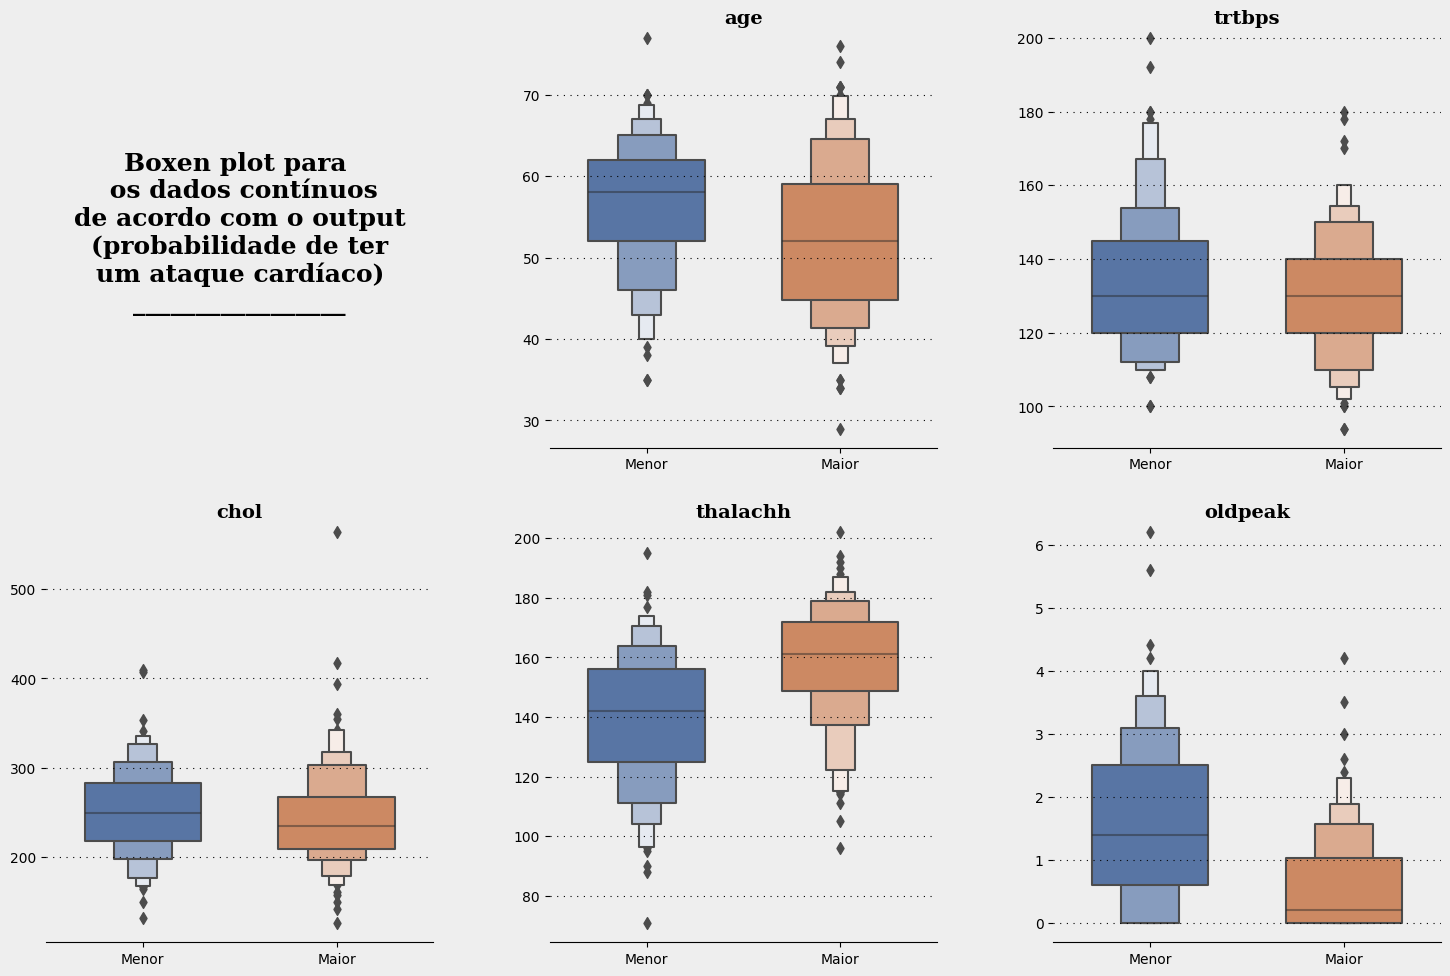

In [8]:
fig = plt.figure(figsize=(18,12))
grid_location = fig.add_gridspec(2,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuous) + 1):
    if(i < 3):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-3]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Title of the plot
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Boxen plot para \n os dados contínuos\n'
         +'de acordo com o output\n(probabilidade de ter\num ataque cardíaco)\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen plots 
for i in range(1,len(continuous) + 1):
    ax[i].text(0.5, 1, continuous[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax[i],y=data[continuous[i-1]],x=data['output'],width=0.6)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set(xticklabels=["Menor","Maior"])
    ax[i].spines["bottom"].set_visible(True)

O "thalachh" apresentou um boxen plot com valores mais altos para as pessoas com maior probabilidade. Essa feature pode ser analisada mais a fundo como um fator importante a ser analisado antes da criação dos modelos 

### Distribuição dos dados de acordo com o output

#### Função para gerar os gráficos

In [9]:
def plot_kde(title,name_feature):
    fig = plt.figure(figsize=(8,6))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 
    ax = sns.kdeplot(data=data,x=name_feature,hue='output')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color) 
    ax.set_xlabel("")
    ax.set_title(title,fontsize=14)
    plt.legend(title="Probabilidade infarto",labels=["Maior","Menor"])

#### Idade

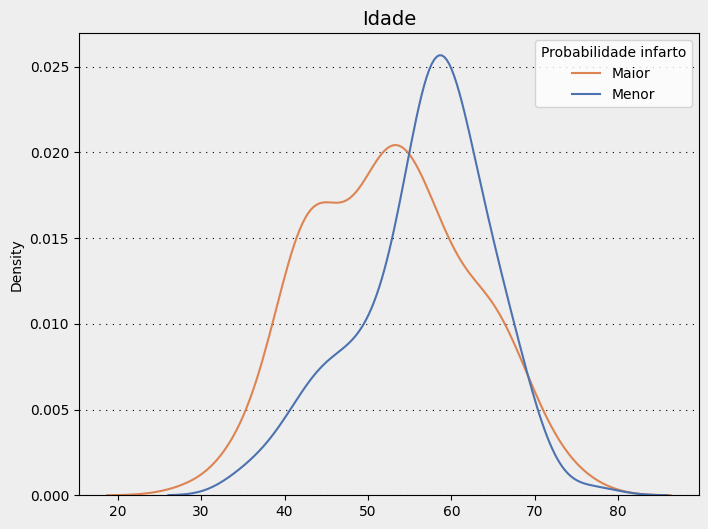

In [10]:
plot_kde("Idade",'age')

#### Pressão arterial em repouso (mm Hg)

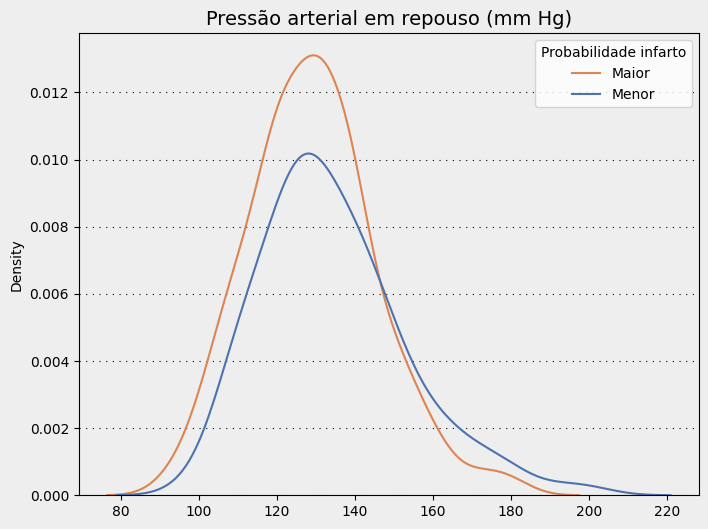

In [11]:
plot_kde("Pressão arterial em repouso (mm Hg)","trtbps")

#### Colesterol (mg/dl)

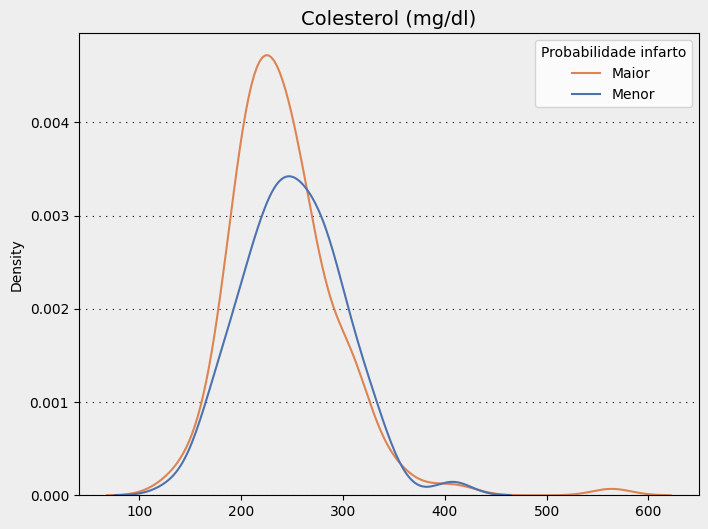

In [12]:
plot_kde("Colesterol (mg/dl)","chol")

#### Máxima frequência cardíaca

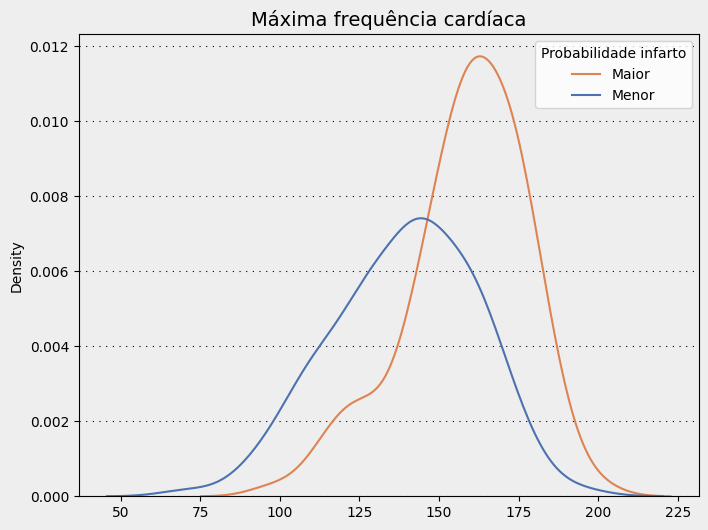

In [13]:
plot_kde("Máxima frequência cardíaca","thalachh")

#### Depressão ST induzida por exercício em relação ao repouso

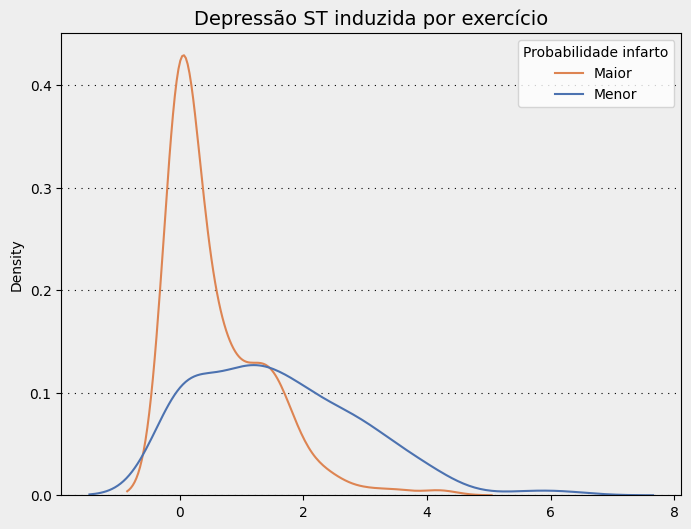

In [14]:
plot_kde("Depressão ST induzida por exercício","oldpeak")

Os dados com probabilidade de infarto maior estão concentrados nos valores mais baixos

## Dados Categóricos

### Gráfico de colunas para os dados categóricos

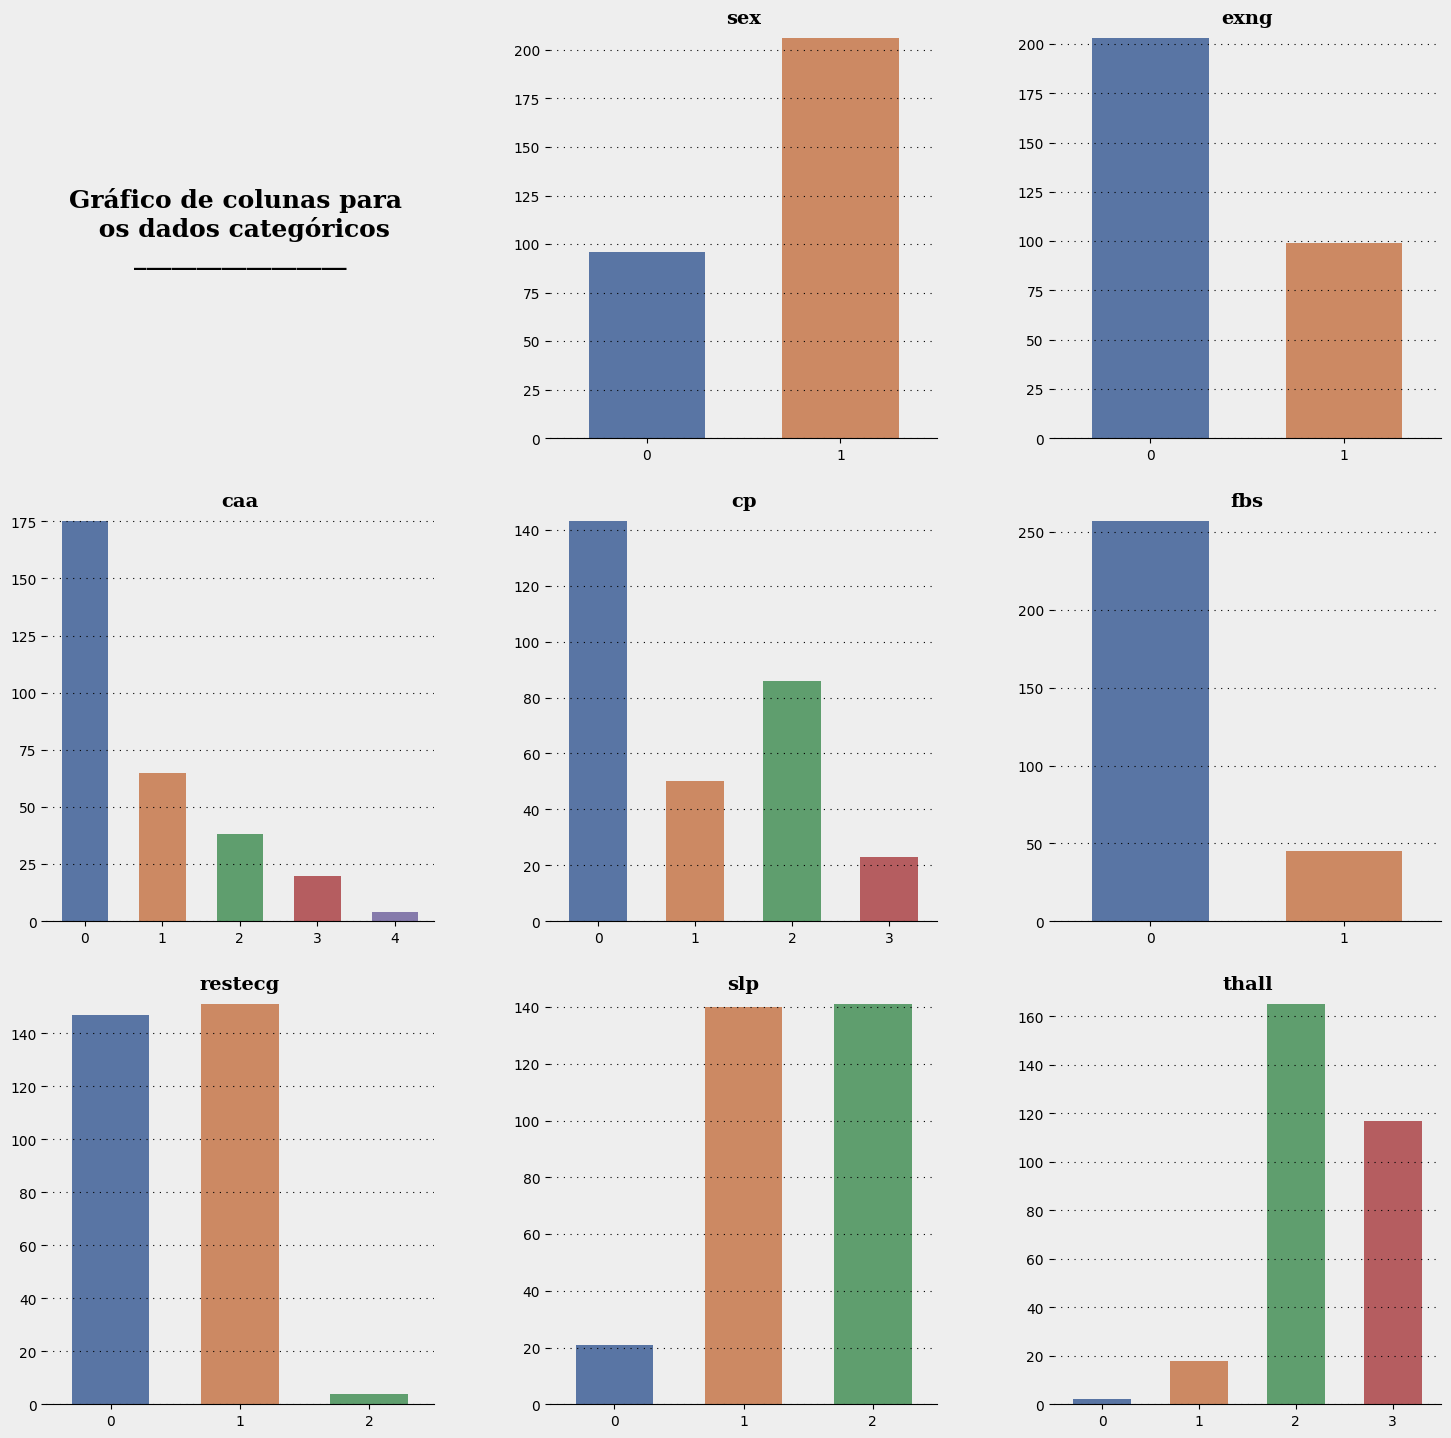

In [15]:
fig = plt.figure(figsize=(18,18))
grid_location = fig.add_gridspec(3,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(3):
    for j in range(3):
        ax.append(fig.add_subplot(grid_location[i,j]))

for i in range(len(categorical) + 1):
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Title of the plot
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Gráfico de colunas para \n os dados categóricos\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen plots 
for i in range(1,len(categorical) + 1):
    ax[i].text(0.5, 1, categorical[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax[i],x=data[categorical[i-1]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].spines["bottom"].set_visible(True)

### Analisando os dados categóricos de acordo com o output

#### Função para gerar os gráficos da barras

In [16]:
def plot_cat_feature(title,name_feature,x_labels):
    fig = plt.figure(figsize=(8,6))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 

    ax = sns.countplot(x=data[name_feature],hue=data["output"])
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color) 
    ax.set_ylabel("Quantidade")
    ax.set_xlabel("")
    ax.set(xticklabels=x_labels)
    ax.set_title(title,fontsize=14)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.legend(title="Probabilidade infarto",labels=["Menor","Maior"])

#### Sexo

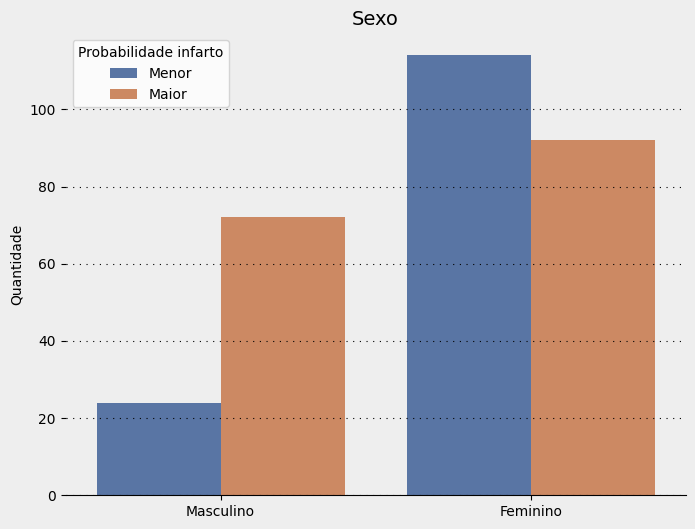

In [17]:
plot_cat_feature("Sexo","sex",["Masculino","Feminino"])

<ul>
    <li>As pessoas de sexo masculino tem maior probabilidade de ter ataque cardíaco</li>
    <li>O dataset não está balanceado em relação ao sexo (Existem mais homens que mulheres no mundo)</li>
</ul>

#### Angina induzida por exercício

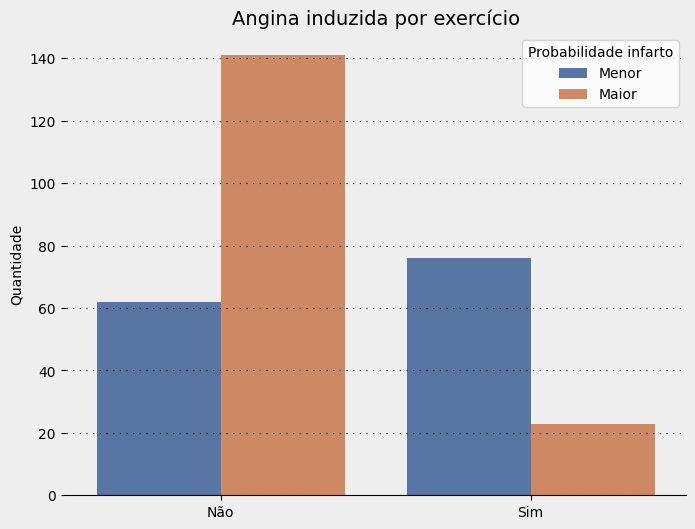

In [18]:
plot_cat_feature("Angina induzida por exercício","exng",["Não","Sim"])

<ul>
    <li>Quem não teve angina induzida por exercício tem maior probabilidade de infarto</li>
</ul>

#### Número de vasos principais

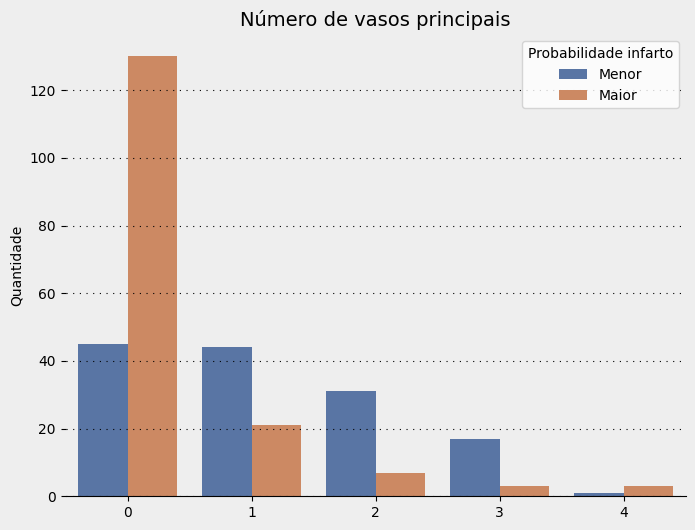

In [19]:
plot_cat_feature("Número de vasos principais","caa",["0","1","2","3","4"])

<ul>
    <li>Quem possui 0 vasos principais tem maior probabilidade</li>
</ul>

#### Tipo de dor no peito

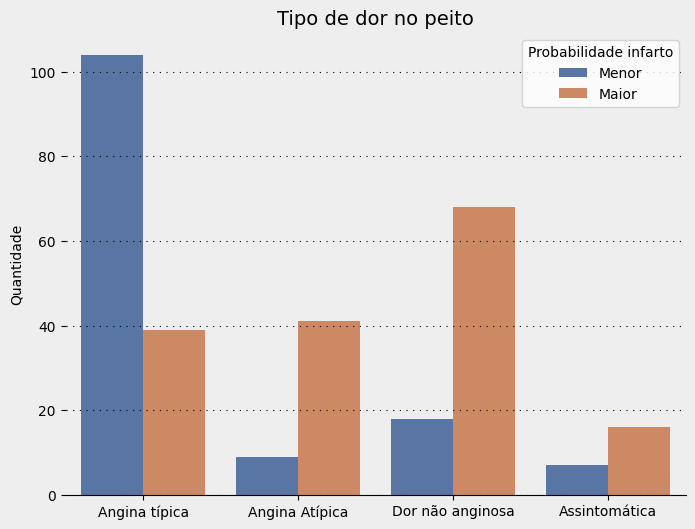

In [20]:
plot_cat_feature("Tipo de dor no peito","cp",["Angina típica","Angina Atípica","Dor não anginosa","Assintomática"])

<ul>
    <li>A angina típica é a dor na qual os casos com menor probabilidade estão concentrados</li>
</ul>

#### Acúcar no sangue em jejum > 120 mg/dl

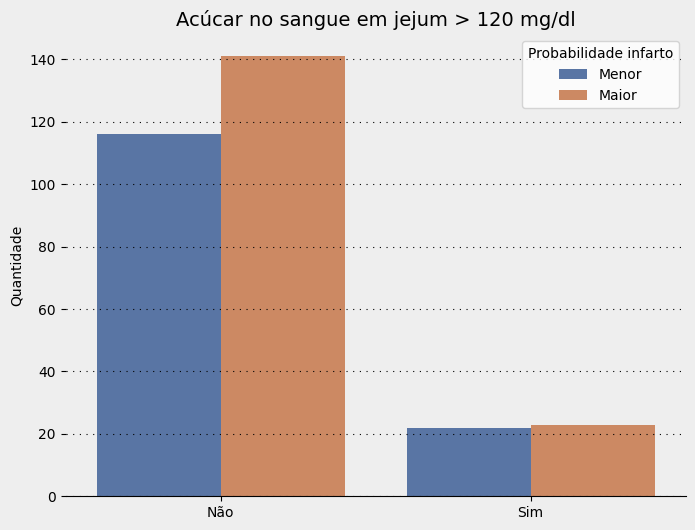

In [21]:
plot_cat_feature("Acúcar no sangue em jejum > 120 mg/dl","fbs",["Não","Sim"])

#### Resultados de eletrocardiografia em repouso

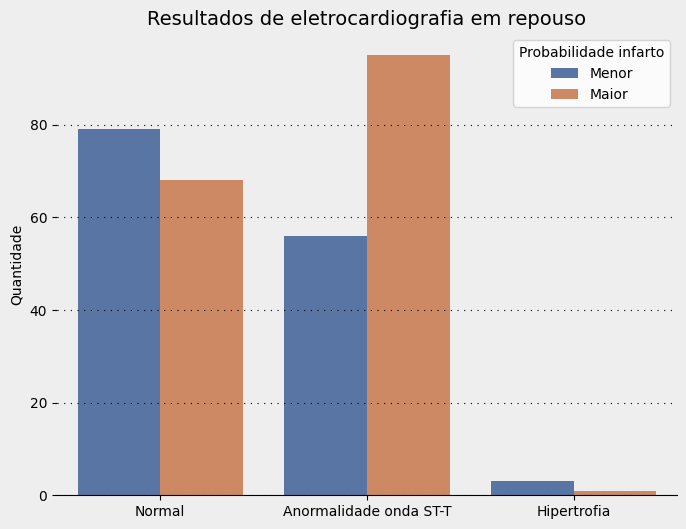

In [22]:
plot_cat_feature("Resultados de eletrocardiografia em repouso","restecg",["Normal","Anormalidade onda ST-T","Hipertrofia"])

<ul>
    <li>Anormalidade na onda ST-T é um indício de maior probabilidade de infarto</li>
</ul>

#### Inclinação do pico do segmento ST do exercício

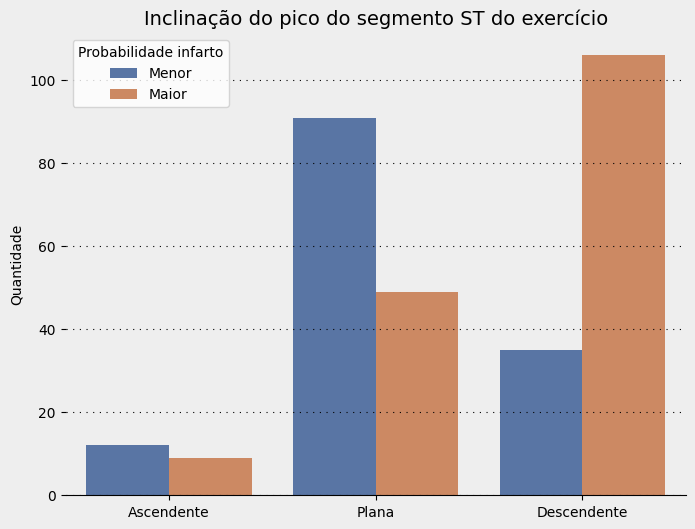

In [23]:
plot_cat_feature("Inclinação do pico do segmento ST do exercício","slp",["Ascendente","Plana","Descendente"])

<ul>
    <li>Inclinação descendente no pico do segmento ST está relacionada a uma maior probabilidade de infarto</li>
</ul>

#### Talassemia

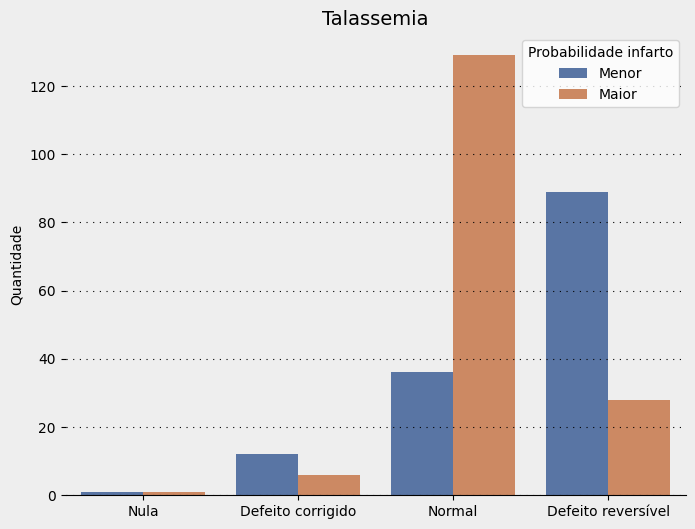

In [24]:
plot_cat_feature("Talassemia","thall",["Nula","Defeito corrigido","Normal","Defeito reversível"])

<ul>
    <li>Talassemia normal está relacionada a maior probabilidade de infarto</li>
</ul>

### Output

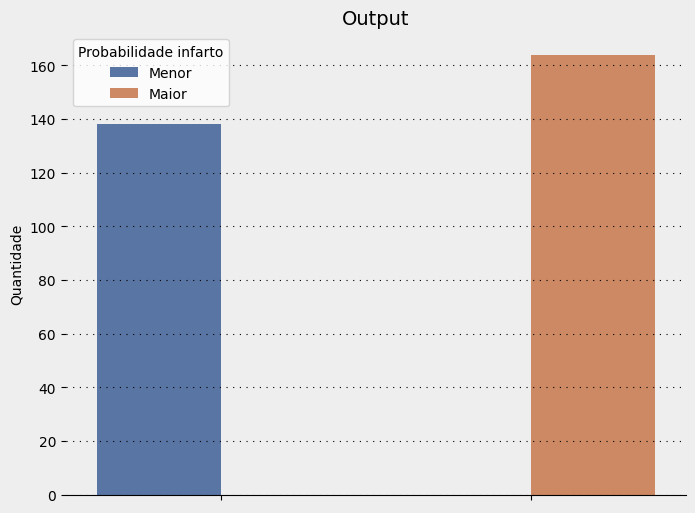

In [25]:
plot_cat_feature("Output","output",[])

## Correlação dos dados

Text(0.5, 1.0, 'Correlação entre as features')

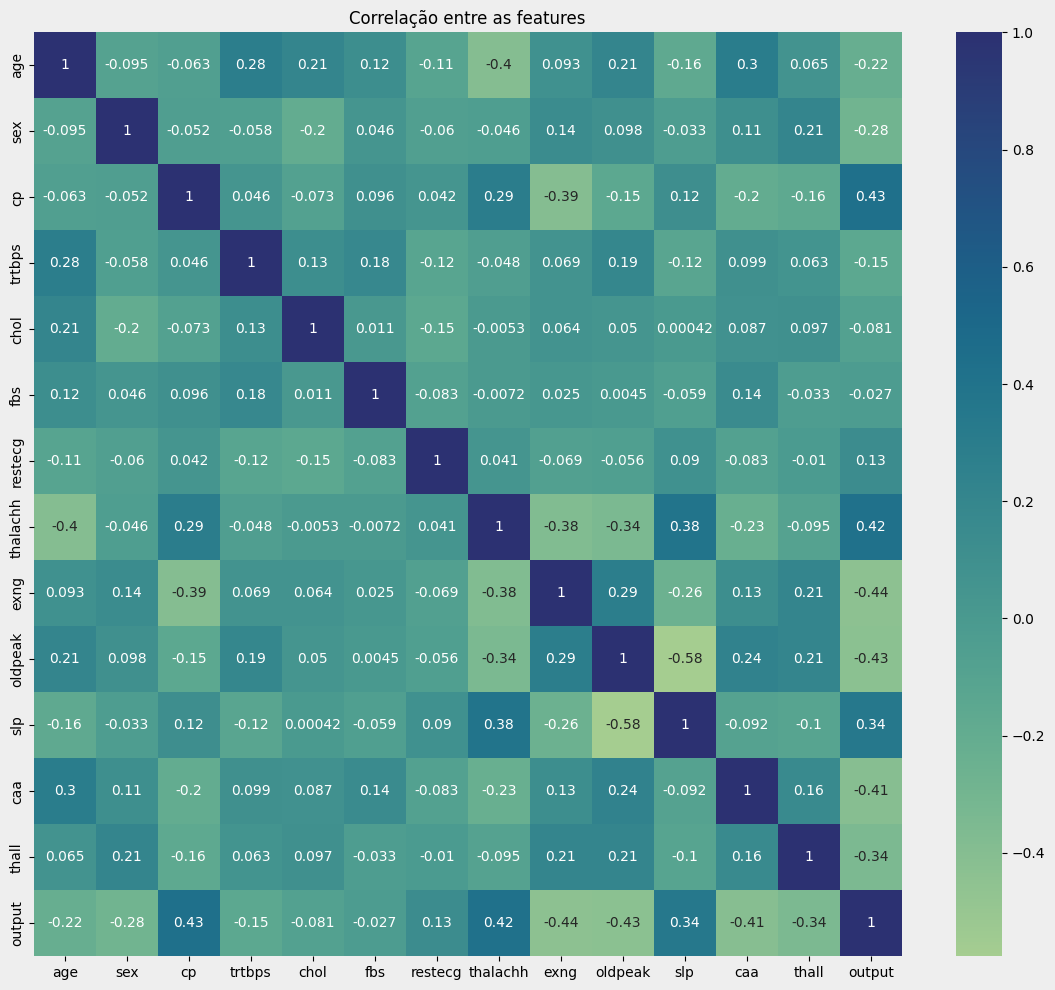

In [26]:
fig = plt.figure(figsize=(14,12))
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 
ax = sns.heatmap(data.corr(),annot=True, cmap="crest")
ax.set_facecolor(background_color)
ax.set_title("Correlação entre as features")

<ul>
    <li>"Cp","thalachh" e "slp" são os que possuem uma maior correlação positiva com o output</li>
    <li>"exng","oldpeak","caa" e "thall" são os que possuem uma maior correlação negativa com o output</li>
</ul>